In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [3]:
df =pd.DataFrame(data.data, columns=data.feature_names)
df['price'] = data['target']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df = df.sample(frac=0.20) # taking only 20 % for data 

In [5]:
X = df.drop("price", axis=1)
y = df["price"]
y

1177     0.394
7535     0.988
2520     0.731
11824    1.668
7402     0.990
         ...  
13958    1.535
12732    3.440
19067    2.976
13781    1.035
18557    3.885
Name: price, Length: 4128, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [8]:
y_pred = regressor.predict(X_test)
y_pred

array([1.55 , 1.672, 1.487, ..., 2.153, 2.135, 1.586])

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5334513130254146

Hyperparameter tuning

In [10]:
parameter ={
    'criterion' :['squared_error', 'poisson'],
    'max_depth':[1,2,3,4,6,8],
    'splitter':['best','random'],
    'max_features':['sqrt','log2']
}
reg = DecisionTreeRegressor()

In [11]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(reg,param_grid=parameter, cv=5, scoring="neg_mean_squared_error")# neg_mean_squared_error is used for regression
model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [12]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [13]:
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [14]:
model.best_score_

-0.5597193338556135

    "Follow the class notebook from here and verify"

In [15]:
final_model = DecisionTreeRegressor(criterion='squared_error',max_depth=8,max_features='log2',splitter='best')
final_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='log2')

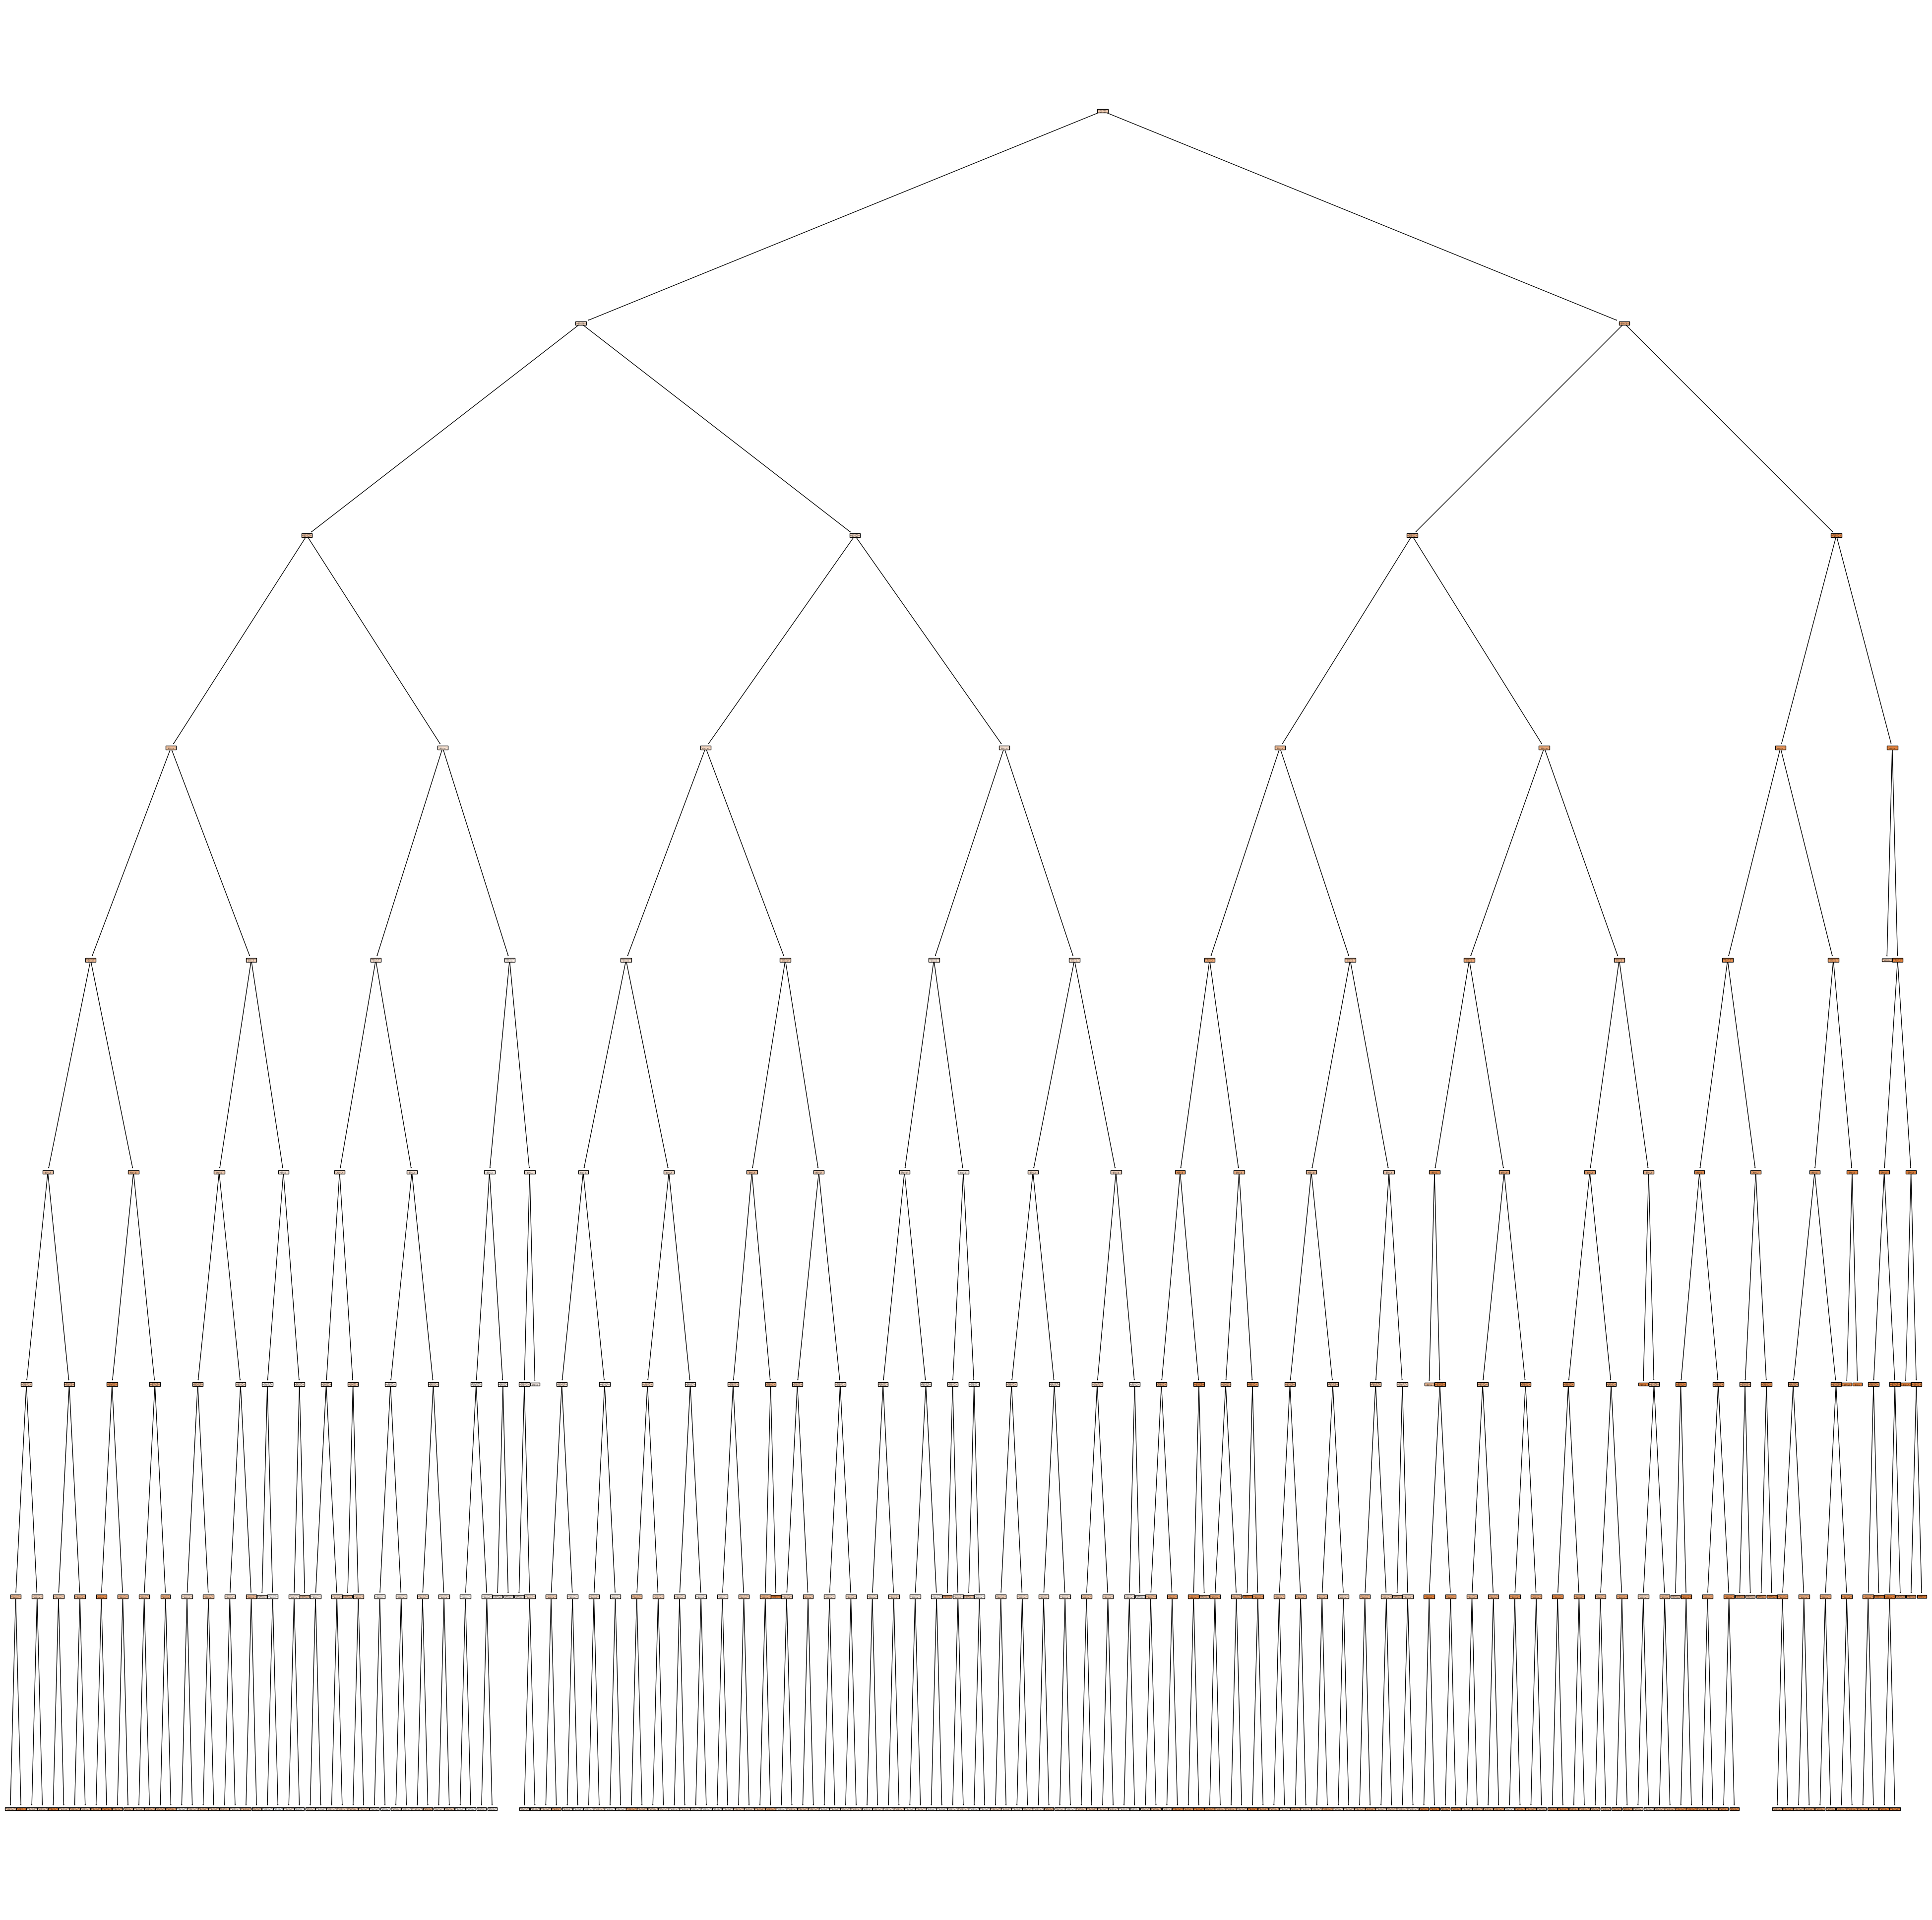

In [16]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(final_model,filled=True)
plt.show()

In [17]:
y_pred = final_model.predict(X_test)
r2_score(y_test,y_pred)

0.6147441349122252

***R2 Score before hyper tuning was around .47 and after tuning it is .60***